In [1]:
# standard
import numpy as np
import pandas as pd
from numpy.random import randn

# stats
from scipy import stats

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/Users/kolobj/anaconda/envs/cmu3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/kolobj/anaconda/envs/cmu3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/kolobj/anaconda/envs/cmu3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
dataset = randn(25)

(0, 1)

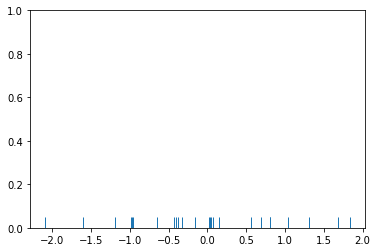

In [3]:
sns.rugplot(dataset)
plt.ylim(0,1)

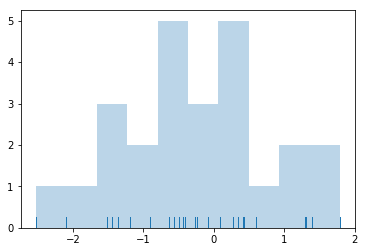

In [4]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

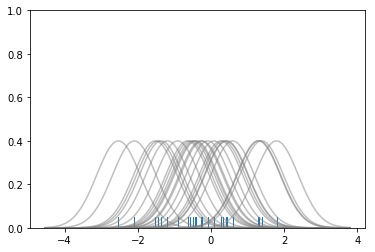

In [5]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ( (4*dataset.std()**5) / (3*len(dataset)) ) ** 0.2

kernel_list = []

for data_point in dataset:
    # create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel,color='gray',alpha=0.5)
    
plt.ylim(0,1)

Text(0.5,0.98,'Sum of the basis functions')

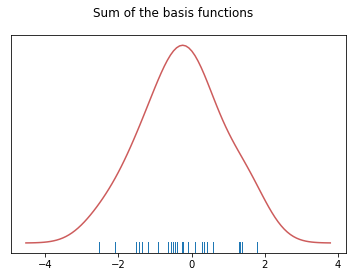

In [6]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle('Sum of the basis functions')

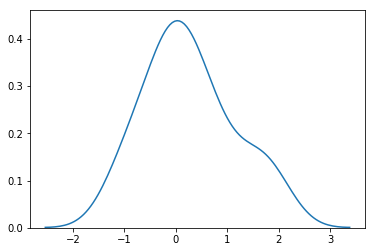

In [8]:
sns.kdeplot(dataset)

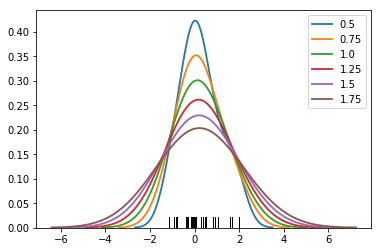

In [9]:
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

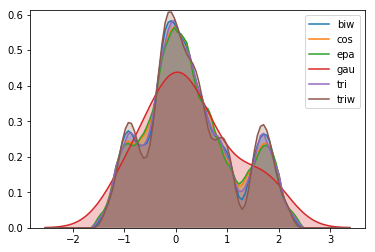

In [10]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern, shade=True)

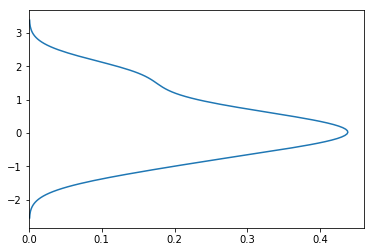

In [11]:
sns.kdeplot(dataset,vertical=True)

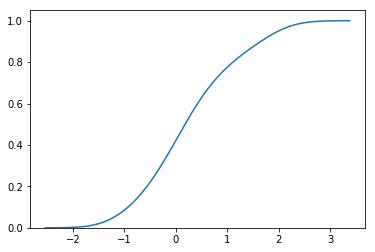

In [12]:
sns.kdeplot(dataset,cumulative=True)

/Users/kolobj/anaconda/envs/cmu3/lib/python3.6/site-packages/seaborn/distributions.py:630: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


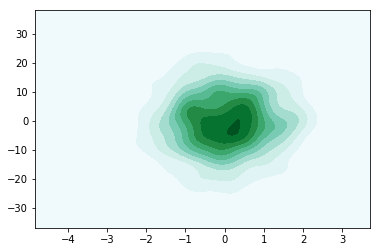

In [13]:
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean, cov, 1000)

dframe = pd.DataFrame(dataset2,columns=['X','Y'])

sns.kdeplot(dframe, shade=True)

/Users/kolobj/anaconda/envs/cmu3/lib/python3.6/site-packages/seaborn/distributions.py:630: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


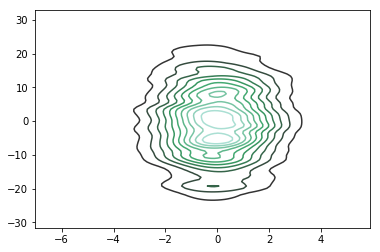

In [14]:
sns.kdeplot(dframe,bw=1)

/Users/kolobj/anaconda/envs/cmu3/lib/python3.6/site-packages/seaborn/distributions.py:630: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


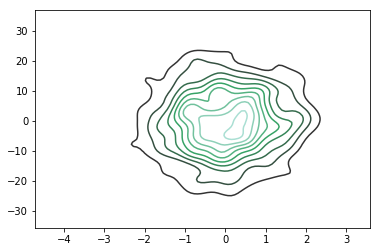

In [15]:
sns.kdeplot(dframe,bw='silverman')

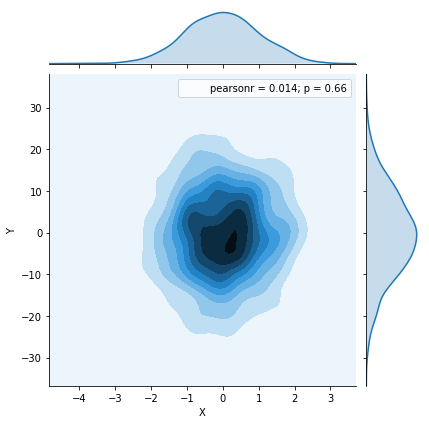

In [16]:
sns.jointplot('X','Y',dframe,kind='kde')